# Feature Engineering

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data_frame = pd.read_csv('salary_data_cleaned.csv')

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Job Title                       3313 non-null   object 
 1   Salary Estimate                 3313 non-null   object 
 2   Job Description                 3313 non-null   object 
 3   Rating                          3313 non-null   float64
 4   Company Name                    3313 non-null   object 
 5   Location                        3313 non-null   object 
 6   Size                            3313 non-null   object 
 7   Founded                         3313 non-null   int64  
 8   Type of ownership               3313 non-null   object 
 9   Industry                        3313 non-null   object 
 10  Sector                          3313 non-null   object 
 11  Revenue                         3313 non-null   object 
 12  City                            33

## Categorical variables

### 1. Type of Ownership

In [4]:
#value counts for ownership map 
data_frame["Type of ownership"].value_counts()

Company - Private                 1474
Company - Public                  1284
Nonprofit Organization             141
Subsidiary or Business Segment     137
Unknown                             96
College / University                80
Government                          44
Hospital                            19
Self-employed                       15
Contract                            14
Private Practice / Firm              8
School / School District             1
Name: Type of ownership, dtype: int64

In [5]:
## Dealing with uncommon categories
# Create a series out of the onwership column
ownership = data_frame['Type of ownership']

# Get the counts of each category
ownership_counts = ownership.value_counts()

# Create a mask for only categories that occur less than 200 times
mask = ownership.isin(ownership_counts[ownership_counts < 200].index)

# Label all other categories as Other
ownership[mask] = 'Other'

# Print the updated category counts
print(ownership.value_counts()) 

Company - Private    1474
Company - Public     1284
Other                 555
Name: Type of ownership, dtype: int64


C:\Users\WM796GU\AppData\Local\Temp\ipykernel_11020\1658777323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ownership[mask] = 'Other'


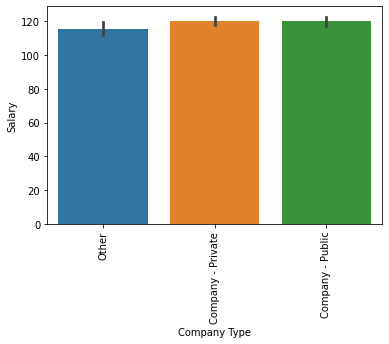

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=data_frame['Type of ownership'], y=data_frame['avg_salary'])
  
plt.xlabel("Company Type")
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.show()

### 2. Sector

In [7]:
#value counts for sector map 
data_frame["Sector"].value_counts()

Information Technology                         733
Financial Services                             453
Management & Consulting                        351
-1                                             307
Manufacturing                                  189
Healthcare                                     170
Media & Communication                          154
Pharmaceutical & Biotechnology                 139
Human Resources & Staffing                     135
Retail & Wholesale                             112
Insurance                                       93
Education                                       87
Aerospace & Defense                             84
Transportation & Logistics                      58
Energy, Mining & Utilities                      50
Government & Public Administration              44
Telecommunications                              36
Real Estate                                     26
Construction, Repair & Maintenance Services     22
Nonprofit & NGO                

In [8]:
## Dealing with uncommon categories
# Create a series out of the Sector column
sector = data_frame['Sector']

# Get the counts of each category
sector_counts = sector.value_counts()

# Create a mask for only categories that occur less than 120 times
mask = sector.isin(sector_counts[sector_counts < 120].index)

# Label all other categories as Other
sector[mask] = 'Other'
sector.loc[lambda x : x == '-1']='Unknown'

# Print the updated category counts
print(sector.value_counts()) 

Information Technology            733
Other                             682
Financial Services                453
Management & Consulting           351
Unknown                           307
Manufacturing                     189
Healthcare                        170
Media & Communication             154
Pharmaceutical & Biotechnology    139
Human Resources & Staffing        135
Name: Sector, dtype: int64


C:\Users\WM796GU\AppData\Local\Temp\ipykernel_11020\1915616575.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector[mask] = 'Other'
C:\Users\WM796GU\AppData\Local\Temp\ipykernel_11020\1915616575.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector.loc[lambda x : x == '-1']='Unknown'


### 3. Revenue

In [9]:
data_frame["Revenue"].value_counts()

Unknown / Non-Applicable            937
$10+ billion (USD)                  933
$1 to $5 billion (USD)              363
$5 to $10 billion (USD)             316
$25 to $100 million (USD)           259
$100 to $500 million (USD)          171
$500 million to $1 billion (USD)    121
$5 to $25 million (USD)              98
$1 to $5 million (USD)               67
Less than $1 million (USD)           48
Name: Revenue, dtype: int64

In [10]:
# Using ordinal encoding as there is an order in the different categories
rev_map = {"$10+ billion (USD)": 9, 
          "$5 to $10 billion (USD)": 8, 
          "$1 to $5 billion (USD)":7,
          "$500 million to $1 billion (USD)": 6,
          "$100 to $500 million (USD)": 5,
          "$25 to $100 million (USD)": 4,
          "$5 to $25 million (USD)": 3,
          "$1 to $5 million (USD)": 2,
          "Less than $1 million (USD)": 1,
          "Unknown / Non-Applicable": 0}

In [11]:
data_frame["Revenue"] = data_frame["Revenue"].map(rev_map)

In [12]:
data_frame['Revenue'].value_counts()

0    937
9    933
7    363
8    316
4    259
5    171
6    121
3     98
2     67
1     48
Name: Revenue, dtype: int64

### 4. Size of company

In [13]:
#get Value caount for size of company 
data_frame["Size"].value_counts()

10000+ Employees           1489
1001 to 5000 Employees      501
51 to 200 Employees         270
1 to 50 Employees           258
5001 to 10000 Employees     220
Unknown                     207
201 to 500 Employees        195
501 to 1000 Employees       173
Name: Size, dtype: int64

In [14]:
#remap size category

size_map = {"10000+ Employees":7,
           "5001 to 10000 Employees": 6,
            "1001 to 5000 Employees": 5,
           "501 to 1000 Employees": 4,
            "201 to 500 Employees": 3,
           "51 to 200 Employees":2,
           "1 to 50 Employees":1,
           "Unknown":0}

data_frame["Size"] = data_frame["Size"].map(size_map)
data_frame["Size"].value_counts()

7    1489
5     501
2     270
1     258
6     220
0     207
3     195
4     173
Name: Size, dtype: int64

### 5. Location

In [15]:
# to see output completely
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [16]:
#value counts for states
data_frame["job_state"].value_counts()

CA    652
TX    281
FL    259
OH    256
NC    182
NY    180
VA    113
MD    111
MO    109
MA     97
AZ     90
MI     86
CO     84
WA     82
IL     82
UT     80
OR     80
MN     79
GA     76
PA     64
IN     59
TN     55
DC     52
NV     34
KS     24
HI     20
NJ     18
DE      6
KY      1
SC      1
Name: job_state, dtype: int64

In [17]:
#create dictionary of states with respective US geo areas

state_dict = {'WEST': ['CA', 'OR', 'WA', 'UT', 'NV','HI'],
            'NORTH_EAST': ['MD', 'PA', 'NY', 'MA', 'DC','NJ'],
            'SOUTH': ['AZ', 'TX', 'VA', 'FL', 'GA', 'NC','SC','TN','MD','DE','KY'],
            'MIDWEST': ['MN', 'IL', 'IN','MI', 'OH', 'CO', 'MO', 'OH', 'KS']}

In [18]:
#reverse dictinary to create map

geo_map = {value: key for key in state_dict for value in state_dict[key]}

In [19]:
#create geogrpahical labels based on location

data_frame["US"] = data_frame["job_state"].map(geo_map)
data_frame["US"].value_counts()

SOUTH         1175
WEST           948
MIDWEST        779
NORTH_EAST     411
Name: US, dtype: int64

In [20]:
data_frame["US"].isna().sum()

0

In [21]:
data_frame.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,job_state,job_simp,seniority,desc_len,python_yn,sql_yn,age,US
0,Geospatial Researcher/Data Scientist IV,$76K - $120K (Glassdoor est.),Battelle delivers when others can’t. We conduc...,3.6,Battelle,"Fort Belvoir, VA",5,1929,Other,Research & Development,...,120.0,98.0,VA,data scientist,na,984,0,0,93,SOUTH
1,Senior Data Scientist,$101K - $138K (Glassdoor est.),"JDSAT, Inc. is a solutions company - utilizing...",4.3,JDSAT,"McLean, VA",1,-1,Company - Private,-1,...,138.0,119.5,VA,data scientist,senior,1127,0,0,36,SOUTH
2,Software Integrator / Data Scientist - Expert ...,$74K - $109K (Glassdoor est.),*** Must have TS/SCI ***\nJOB DESCRIPTION:\nIn...,4.6,Que Technology Group,"McLean, VA",1,-1,Company - Private,-1,...,109.0,91.5,VA,data scientist,na,594,0,0,36,SOUTH
3,Lead Data Scientist,$116K - $161K (Glassdoor est.),Tensure is a fully-remote technology consultin...,3.8,Tensure Consulting,"Washington, DC",1,-1,Company - Private,-1,...,161.0,138.5,DC,data scientist,senior,853,1,1,36,NORTH_EAST
4,Data Scientist,$76K - $108K (Glassdoor est.),"JDSAT, Inc. is a solutions company - utilizing...",4.3,JDSAT,"McLean, VA",1,-1,Company - Private,-1,...,108.0,92.0,VA,data scientist,na,1325,0,0,36,SOUTH


In [22]:
data_frame['Sector'].value_counts()

Information Technology            733
Other                             682
Financial Services                453
Management & Consulting           351
Unknown                           307
Manufacturing                     189
Healthcare                        170
Media & Communication             154
Pharmaceutical & Biotechnology    139
Human Resources & Staffing        135
Name: Sector, dtype: int64

In [23]:
#standardize numerical variables

num_cols = ["Rating","Cost of Living Index","Rent Index","Cost of Living Plus Rent Index","Local Purchasing Power Index",
            "age","desc_len"]
std = StandardScaler()
std.fit(data_frame[num_cols].values)

#apply
data_frame[num_cols]= std.transform(data_frame[num_cols].values)

In [24]:
data_frame.to_csv('salary_data_cleaned_with_feature_engg.csv', index = False)